## Import Libraries

In [49]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression


In [11]:
# Load data from a url 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

df = read_csv(url, names=names)

df.head(20)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Summarize the data 

In [6]:
df.shape

(150, 5)

In [7]:
# statistical summary 

df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#look at the number of instances (rows) that belong to each class.

print(df.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

## data Visualization

for data visualization we have two types of plots

- Univariate : for  one variable 
- multivariate : for relation between two variables 

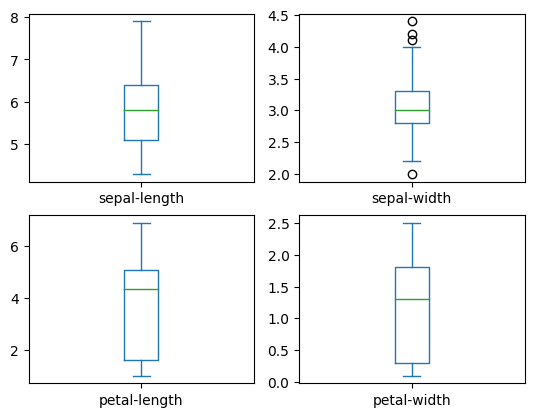

In [25]:
df.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


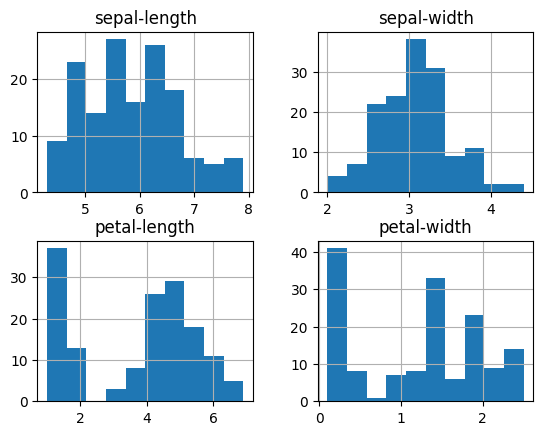

In [32]:
df.hist()
plt.show()

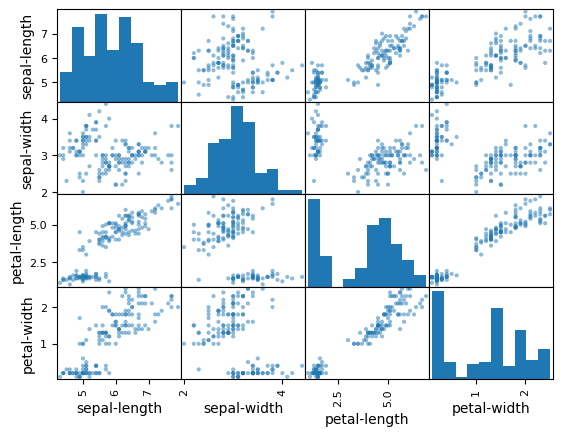

In [36]:
# multivariate plot 
scatter_matrix(df)
plt.show()

# helpful to spot structured relationships between input variables.

## Evaluate some algorithms 

In [37]:
# next create some models of the data and estimate their accuracy on unseen data 

In [43]:
# create a validation dataset 
array = df.values
X = array[:,0:4]
y = array[:,4]


In [44]:
# train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


## stratified 10 fold cross validation 

----------------------------
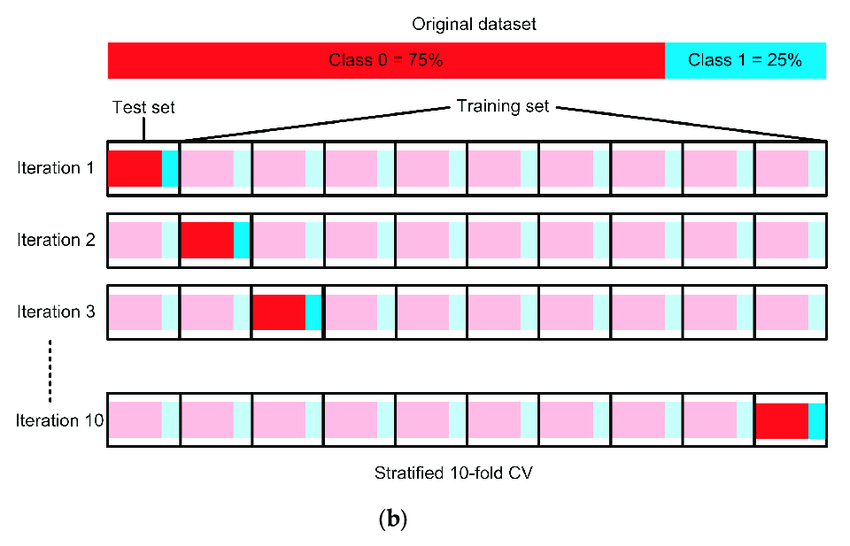

## Cross Validation 
---
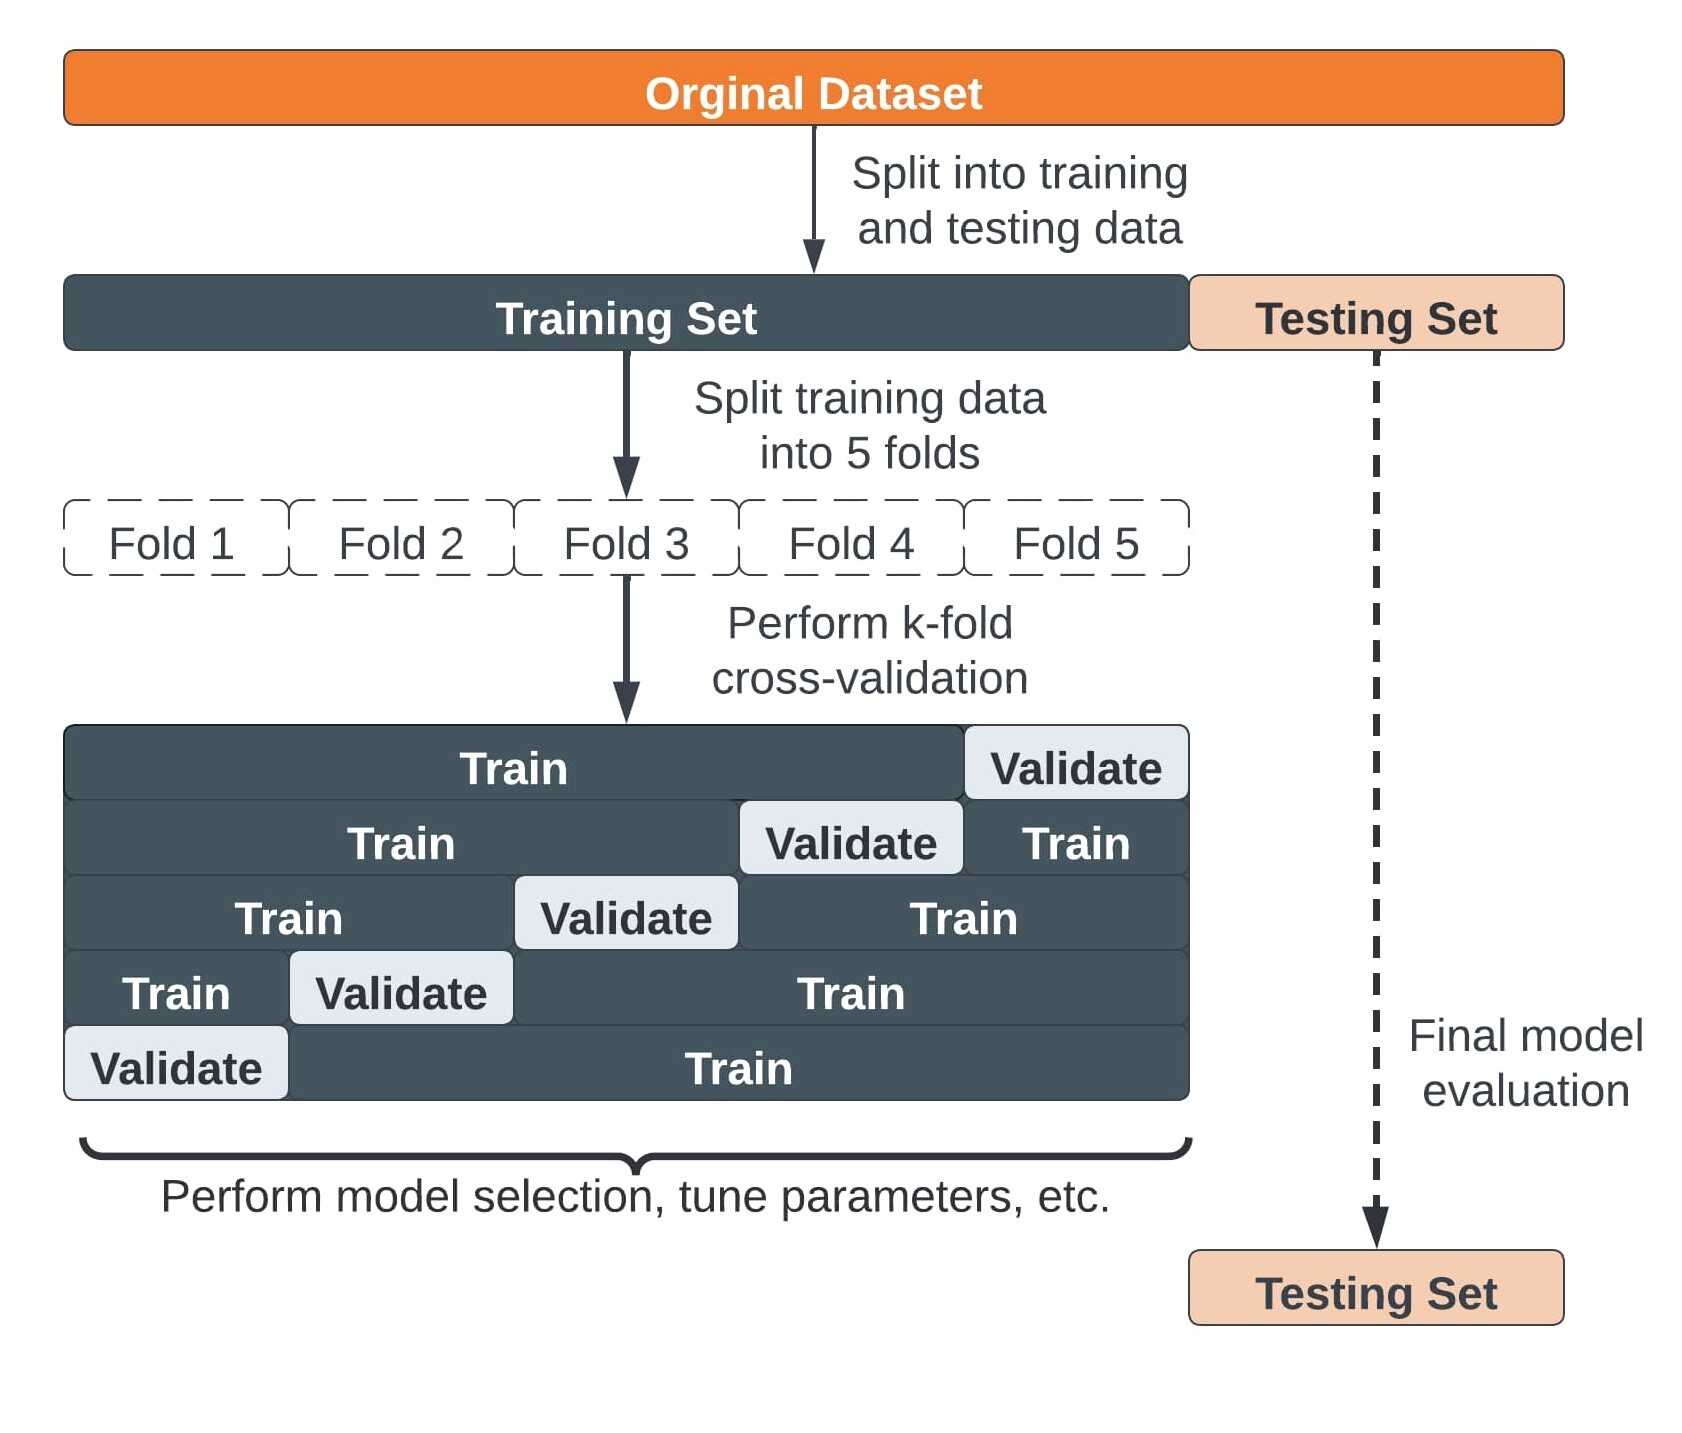

## Spot checking

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


In [51]:
results = []

names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


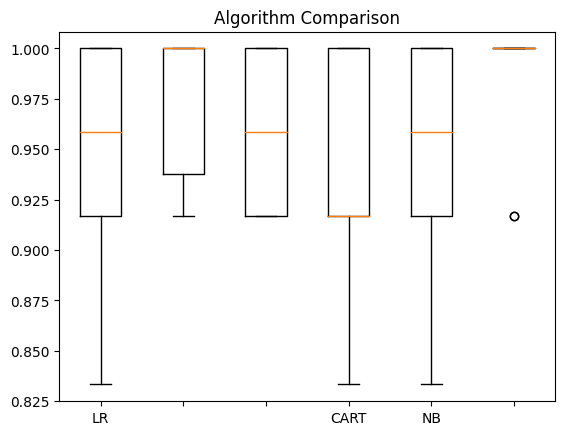

In [56]:
# compare algorithms 

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [64]:
# select SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [65]:
# Evaluate predictions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# generalized code for spot checking
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# load your dataset


data = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = data.drop(columns=['target_column'])
y = data['target_column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define a list of classifiers to test
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Initialize a StratifiedKFold cross-validation splitter
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterate over each classifier
for name, classifier in classifiers.items():
    # Create a pipeline with preprocessing steps and the classifier
    pipeline = make_pipeline(StandardScaler(), classifier)
    
    # Evaluate the classifier using cross-validation
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Print the cross-validation results
    print(f'{name}:')
    print(f'Mean Accuracy: {np.mean(cv_results):.2f}')
    print(f'Standard Deviation: {np.std(cv_results):.2f}')
    
    # Fit the classifier to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the performance on the testing data
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Testing Accuracy: {accuracy:.2f}')
    
    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('------------------------------------------------------')
